In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv("Car_sales_cleaned.csv") #load data
df.head() #data preview (first 5 rows)

,Manufacturer,Model,Sales (Thousands),Year Resale Value,Vehicle Type,Price (Thousands),Engine Size,Horsepower,Wheelbase,Width,Length,Curb Weight,Fuel Capacity,Fuel Efficiency,Latest Launch,Power Performance Factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/12,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/11,91.370778
2,Acura,CL,14.114,18.225,Passenger,24.95,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/12,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/11,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/11,62.777639


In [25]:

df.describe() #summary stats for numeric columns

,Sales (Thousands),Year Resale Value,Price (Thousands),Engine Size,Horsepower,Wheelbase,Width,Length,Curb Weight,Fuel Capacity,Fuel Efficiency,Power Performance Factor
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,52.994987,18.395000,27.375109,3.060897,185.948718,107.487179,71.150000,187.343590,3.381115,17.951923,23.846154,77.043591
std,68.248508,10.694081,14.306617,1.044653,56.700321,7.641303,3.451872,13.431754,0.629648,3.887921,4.261082,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.035000,11.511250,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.407707
50%,29.213000,15.100000,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.030917
75%,68.069750,22.543750,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.821500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [26]:
df.info() #overview of column types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              156 non-null    object 
 1   Model                     156 non-null    object 
 2   Sales (Thousands)         156 non-null    float64
 3   Year Resale Value         156 non-null    float64
 4   Vehicle Type              156 non-null    object 
 5   Price (Thousands)         156 non-null    float64
 6   Engine Size               156 non-null    float64
 7   Horsepower                156 non-null    int64  
 8   Wheelbase                 156 non-null    float64
 9   Width                     156 non-null    float64
 10  Length                    156 non-null    float64
 11  Curb Weight               156 non-null    float64
 12  Fuel Capacity             156 non-null    float64
 13  Fuel Efficiency           156 non-null    int64  
 14  Latest Lau

Q1: What manufacturers have the highest resale value?

In [27]:
# list of the top 10 manufacturers by highest avg. resale vaule to lowest
top_resale = df.groupby('Manufacturer')['Year Resale Value'].mean().sort_values(ascending=False).head(10)
top_resale


Manufacturer
Porsche       56.475000
Mercedes-B    35.163889
BMW           32.400000
Lexus         28.359167
Audi          28.270000
Jaguar        24.500000
Cadillac      23.235000
Volvo         22.940000
Lincoln       22.193333
Acura         21.046250
Name: Year Resale Value, dtype: float64

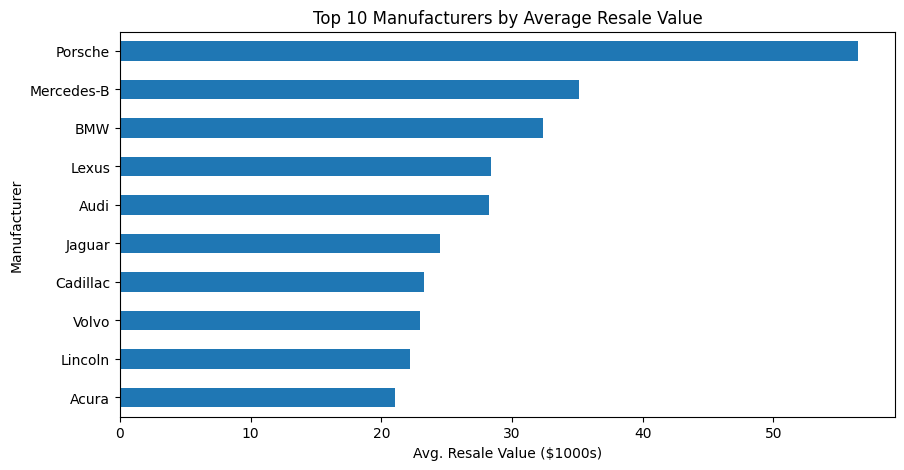

In [33]:
# bar chart: top 10 manufacturers by highest avg. resale vaule to lowest
top_resale.plot(kind='barh', figsize=(10,5))
plt.title("Top 10 Manufacturers by Average Resale Value")
plt.xlabel("Avg. Resale Value ($1000s)")
plt.ylabel("Manufacturer")
plt.gca().invert_yaxis()  # Highest value at the top
plt.show()

Q2: What factors are correlated with resale value?

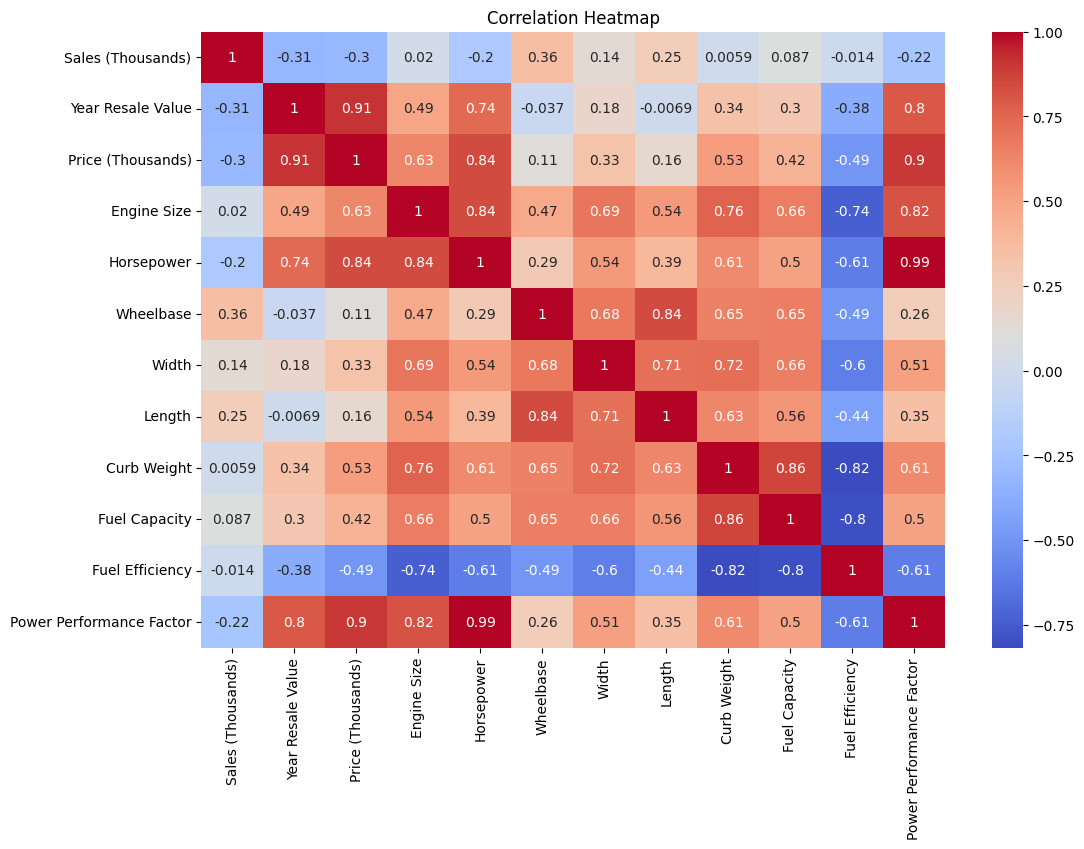

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Q3: 